# Making Final Figures from Observational Data
*Akira Di Sandro, 7/1/20*
<br>
In this notebook, I will be plotting monthly average time series of transport from the 'SolomonStrait_westernXsection_linear2bot_sat4surf.mat' file and an average of all the other non-geoRef files. 

## 1.  Import packages and Load in data

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
from scipy.io import loadmat
x = loadmat('../allTransport_SolomonStrait.mat')

## 2. Convert time stamps into legible and usable ones

### a. Legible to humans

In [4]:
datenums = x['time'][0]
# this line below reads matlab datenums and returns datetime in human legible format
timestamps = pd.to_datetime(datenums-719529, unit='D')

### b. Timestamps in vector format for python

In [5]:
# this code reads matlab datenums and returns it in a datetime vector. 
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366)
    return day + dayfrac

In [6]:
py_dt = []

for time in datenums:
    py_dt = np.concatenate([py_dt, [matlab2datetime(int(time))]])
#py_dt

## 3. Plot Transport timeseries of 'SolomonStrait_westernXsection_linear2bot_sat4surf.mat'

In [41]:
mon_times = []   #21 months total
for i in range(2012,2015):
    for j in range(1,13):
        if i == 2012 and j < 7:
            pass
        elif i == 2014 and j > 3:
            pass
        else:
            mon_times = np.append(mon_times, dt.datetime(i,j,1))

In [56]:
indices = []
for i in range(len(py_dt)):
    if py_dt[i] == dt.datetime(2012,7,23):
        indices = np.append(indices, i)
    for j in range(2012,2015):
        for k in range(1,13):
            if py_dt[i] == dt.datetime(j,k,1):
                indices = np.append(indices, i)

In [120]:
mon_trans = np.zeros(21)
for j in range(len(indices)):
    for i in range(len(x['T'][42])):
        if j == 20:
            if indices[j] <= i < 590:
                mon_trans[j] += x['T'][42][i]
        else:
            if indices[j] <= i < indices[j+1]:
                mon_trans[j] += x['T'][42][i]
    if j == 20:
        mon_trans[j] = mon_trans[j]/(590-indices[j])
    else:
        mon_trans[j] = mon_trans[j]/(indices[j+1]-indices[j])
mon_trans

array([ 15.59549247,  11.20965192,   6.797745  ,  13.36394363,
         8.92943959,  10.96365925,   1.08077607,   0.13673333,
       -16.40712546,  -1.82684491,   0.32007777,   7.15560758,
        14.85008725,  -5.59885346,   6.43458802,  26.24866807,
         9.25145951,   1.91270639,  -1.43947557,  -5.26184773,
         0.3124304 ])

In [121]:
def plot_trans(ds, arr, times):
    transport = ds['T'][arr]
    label = ds['flist'][arr][0][0][0]
    fig, ax = plt.subplots(figsize=(14,8))
    ax.set_ylabel('Transport (Sv)')
    ax.set_xlabel('Time')
    ax.plot(mon_times, mon_trans, label=label)
    ax.legend()
    ax.set_xlim(mon_times[0], mon_times[-1])
    ax.grid(True)
    plt.title('Monthly Average of Transport Calculation Using File 42', fontsize=20)
    plt.show()

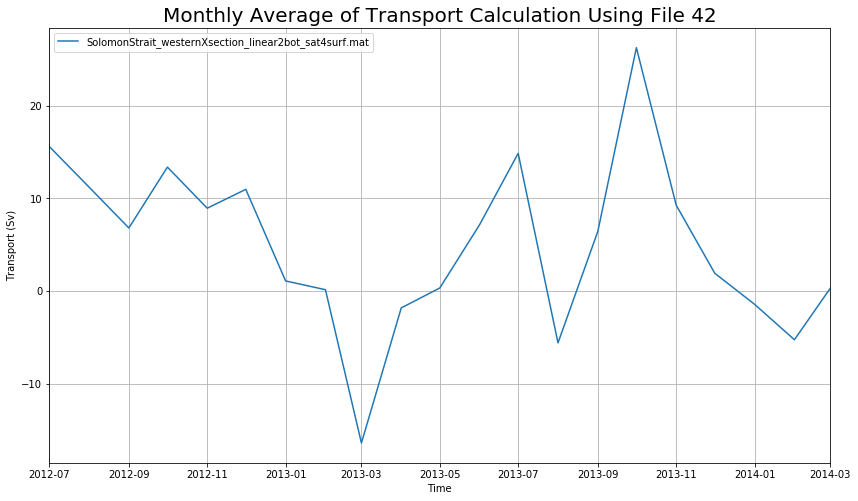

In [123]:
sel_trans = plot_trans(x, 42, mon_times)

## 4. Calculating the average of all other non-geoRef files and plotting that time series

In [124]:
total = []
for arr in range(40,48):
    if arr == 40:
        total = x['T'][40]
    elif arr == 42:
        pass
    else:
        total = np.add(total, x['T'][arr])
total = total/7

In [127]:
avg_mon_trans = np.zeros(21)
for j in range(len(indices)):
    for i in range(len(total)):
        if j == 20:
            if indices[j] <= i < 590:
                avg_mon_trans[j] += total[i]
        else:
            if indices[j] <= i < indices[j+1]:
                avg_mon_trans[j] += total[i]
    if j == 20:
        avg_mon_trans[j] = avg_mon_trans[j]/(590-indices[j])
    else:
        avg_mon_trans[j] = avg_mon_trans[j]/(indices[j+1]-indices[j])
avg_mon_trans

array([ 16.16292667,  11.2817609 ,   6.92209351,  13.19809152,
         7.27384164,   9.46146101,  -1.18890302,  -1.49993123,
       -18.23225093,  -1.62598712,   0.95871982,   6.28005202,
        16.04283914,  -7.42739961,   4.90407634,  28.52083528,
         9.76432279,  -0.85214896,  -3.65391834,  -6.7515817 ,
        -0.52304509])

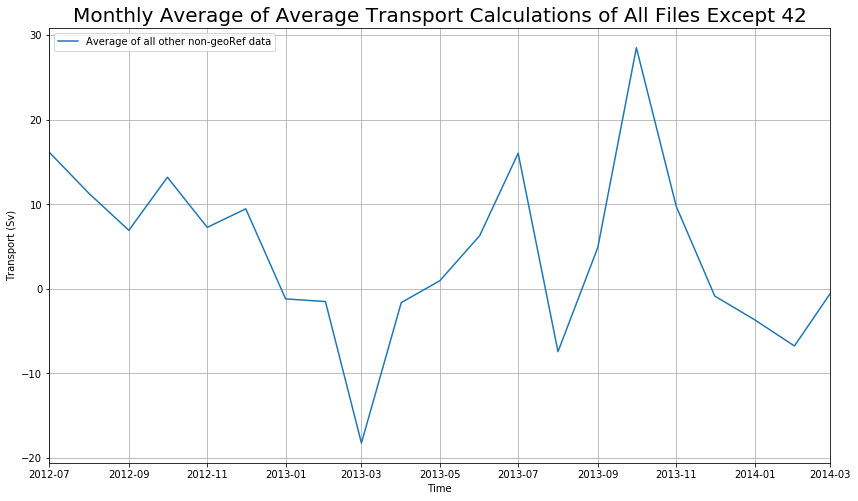

In [128]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylabel('Transport (Sv)')
ax.set_xlabel('Time')
label='Average of all other non-geoRef data'
ax.plot(mon_times, avg_mon_trans, label=label)
ax.legend()
ax.set_xlim(mon_times[0], mon_times[-1])
ax.grid(True)
plt.title('Monthly Average of Average Transport Calculations of All Files Except 42', fontsize=20)
plt.show()

## 5. Plotting both the previous time series on the same figure

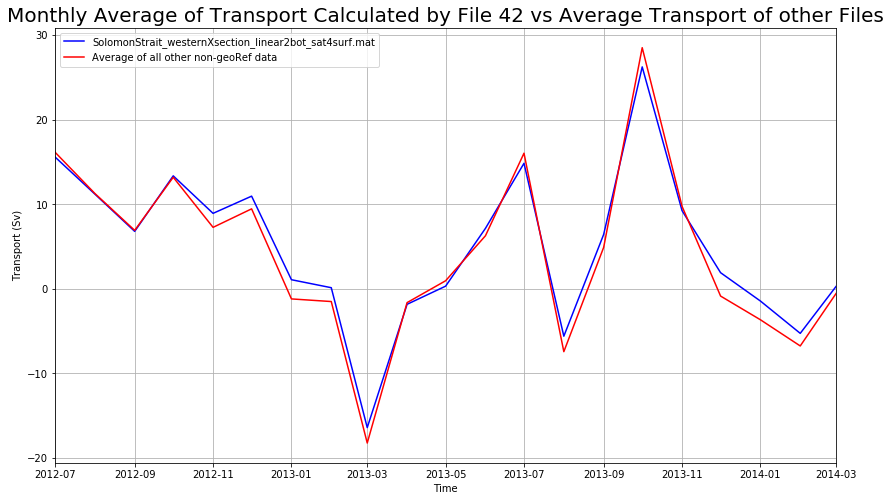

In [129]:
label1 = x['flist'][42][0][0][0]
label2 = 'Average of all other non-geoRef data'
trans1 = mon_trans
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylabel('Transport (Sv)')
ax.set_xlabel('Time')
ax.plot(mon_times, trans1, 'b', label=label1)
ax.plot(mon_times, avg_mon_trans, 'r', label=label2)
ax.set_xlim(mon_times[0], mon_times[-1])
ax.legend()
ax.grid(True)
plt.title('Monthly Average of Transport Calculated by File 42 vs Average Transport of other Files', fontsize=20)
plt.show()

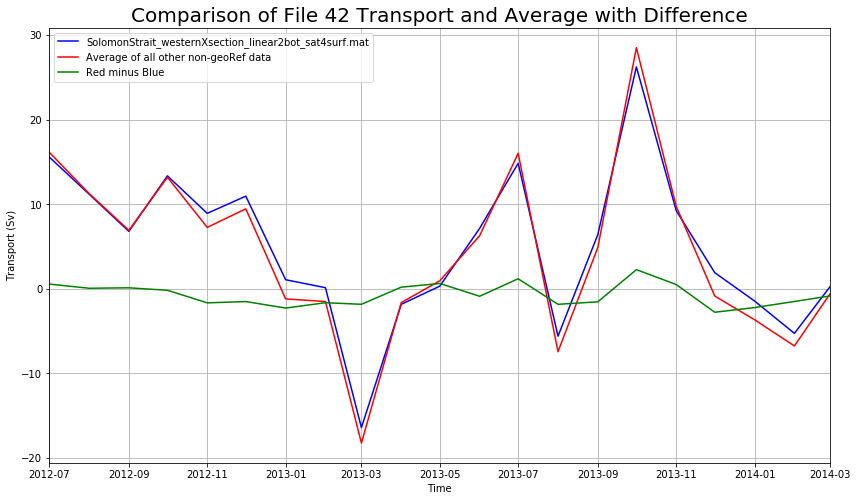

In [130]:
label1 = x['flist'][42][0][0][0]
label2 = 'Average of all other non-geoRef data'
label3 = 'Red minus Blue'
trans1 = mon_trans
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylabel('Transport (Sv)')
ax.set_xlabel('Time')
ax.plot(mon_times, trans1, 'b', label=label1)
ax.plot(mon_times, avg_mon_trans, 'r', label=label2)
ax.plot(mon_times, avg_mon_trans - trans1, 'g', label=label3)
ax.set_xlim(mon_times[0], mon_times[-1])
ax.legend()
ax.grid(True)
plt.title('Comparison of File 42 Transport and Average with Difference', fontsize=20)
plt.show()